#  Análise Exploratória e Modelagem Preditiva do Programa de Fidelidade de Companhia Aérea

Este projeto aplica técnicas de **Análise Exploratória de Dados (EDA)** e **Aprendizado de Máquina** ao conjunto de dados do *Airline Loyalty Program*, com o objetivo de avaliar o impacto de uma **campanha promocional de adesão**, compreender o **comportamento dos clientes** e prever o **cancelamento de membros (churn)**.

A base de dados integra informações de **perfil demográfico**, **histórico de adesão ao programa** e **atividade de voos**, permitindo analisar tanto características dos clientes quanto seu nível de engajamento com a companhia aérea.

---

##  Descrição do Conjunto de Dados

O dataset é composto por duas tabelas principais:

### Customer Loyalty History
Contém informações cadastrais e demográficas dos membros:
- Loyalty Number — identificador único do cliente  
- Enrollment Year / Month — data de adesão  
- Enrollment Type — tipo de inscrição (regular ou promocional)  
- Cancellation Year / Month — data de cancelamento  
- Gender, Education, Salary, Marital Status — dados demográficos  
- City, Province — localização geográfica  

### Customer Flight Activity
Registra a interação operacional dos clientes:
- Flights Booked — voos reservados  
- Flights with Companions — voos com acompanhantes  
- Total Flights — total de voos realizados  
- Points Accumulated — pontos acumulados  
- Points Redeemed — pontos resgatados  

Essas informações possibilitam medir **engajamento, retenção e valor do cliente ao longo do tempo**.

---

##  Objetivos

O projeto busca:

- Realizar uma **Análise Exploratória de Dados (EDA)** para entender padrões de adesão, cancelamento e uso do programa  
- Avaliar o **impacto da campanha promocional** nas novas inscrições  
- Identificar **perfis demográficos mais engajados**  
- Comparar o volume de voos antes e depois da campanha  
- Construir um **modelo preditivo de churn** para antecipar cancelamentos  
- Extrair **insights estratégicos** para marketing e retenção  

---

##  Metodologia

###  Pré-processamento
- Limpeza de dados faltantes e inconsistências  
- Junção das tabelas de histórico e atividade  
- Conversão de datas  
- Criação de variáveis derivadas (Enrollment Date, Status do Cliente)

###  Análise Exploratória (EDA)
- Tendência mensal de novas adesões  
- Comparação antes, durante e após a campanha  
- Distribuições de voos e pontos  
- Segmentação por cidade, província, gênero e renda  
- Visualizações estatísticas e gráficos temporais  

###  Engenharia de Features
- Identificação do período promocional  
- Criação da variável alvo **Churn (Stayed vs Cancelled)**  
- Agregações de atividade de voo e engajamento  

###  Modelagem Preditiva
- Problema de classificação binária  
- Treinamento de **Random Forest Classifier**  
- Avaliação com:
  - Acurácia  
  - Precisão  
  - Recall  
  - F1-score  
- Análise de importância das variáveis  

---

##  Principais Resultados

### Impacto da Campanha
- 971 novas adesões no período promocional  
- 141 cancelamentos  
- Crescimento líquido de 830 clientes  

### Perfil dos Clientes
- Maior concentração de membros em grandes centros urbanos  
- Segmentos específicos apresentaram maior engajamento com o programa  

### Atividade de Voos
- Aumento consistente no número de reservas após a campanha  
- Clientes mais ativos acumulam e resgatam mais pontos  

### Modelo de Churn
- Acurácia aproximada de 95%  
- Bom desempenho na identificação de clientes ativos e churn.
- Variáveis comportamentais foram mais relevantes que demográficas  

---

##  Insights de Negócio

A análise indica que:

- Campanhas promocionais impulsionam o crescimento da base de clientes  
- Segmentação geográfica melhora estratégias de marketing  
- Baixa atividade de voo é forte indicativo de churn  
- Modelos preditivos permitem ações preventivas de retenção  

---

##  Conclusão

Este projeto demonstra como **Ciência de Dados aplicada ao setor aéreo** pode transformar dados operacionais em **decisões estratégicas**, auxiliando na retenção de clientes, aumento do engajamento e otimização de campanhas de fidelidade.

A combinação de **EDA + Machine Learning** possibilita gerar insights valiosos e apoiar o planejamento de negócios orientado por dados.

---

###  Tecnologias Utilizadas
`Python` • `Pandas` • `NumPy` • `Matplotlib` • `Seaborn` • `Scikit-learn` • `Jupyter Notebook`


In [21]:
# importação de bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# Carregar dados
file_path1 = '/content/Customer Flight Activity.csv'
file_path2 = '/content/Customer Loyalty History.csv'

data_member = pd.read_csv (file_path2)
data_flight = pd.read_csv (file_path1)

#Limpeza e pré processamento de dados:


In [23]:
# Visualização dos tipos de dados 1/2
print(data_member.info)


<bound method DataFrame.info of        Loyalty Number Country          Province        City Postal Code  \
0              480934  Canada           Ontario     Toronto     M2Z 4K1   
1              549612  Canada           Alberta    Edmonton     T3G 6Y6   
2              429460  Canada  British Columbia   Vancouver     V6E 3D9   
3              608370  Canada           Ontario     Toronto     P1W 1K4   
4              530508  Canada            Quebec        Hull     J8Y 3Z5   
...               ...     ...               ...         ...         ...   
16732          823768  Canada  British Columbia   Vancouver     V6E 3Z3   
16733          680886  Canada      Saskatchewan      Regina     S1J 3C5   
16734          776187  Canada  British Columbia   Vancouver     V5R 1W3   
16735          906428  Canada             Yukon  Whitehorse     Y2K 6R0   
16736          652627  Canada          Manitoba    Winnipeg     R2C 0M5   

       Gender Education    Salary Marital Status Loyalty Card      

In [24]:
# Visualização dos tipos de dados 2/2
print(data_flight.info)

<bound method DataFrame.info of         Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0               100018  2017      1               3                        0   
1               100102  2017      1              10                        4   
2               100140  2017      1               6                        0   
3               100214  2017      1               0                        0   
4               100272  2017      1               0                        0   
...                ...   ...    ...             ...                      ...   
405619          999902  2018     12               0                        0   
405620          999911  2018     12               0                        0   
405621          999940  2018     12               3                        0   
405622          999982  2018     12               0                        0   
405623          999986  2018     12               0                        0   

       

In [25]:
# Exibindo informações dos DataFrames
data_member.info()
data_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [26]:
# Verificando os dados
unique_values_column1 = data_member['Enrollment Type'].unique()
unique_values_column2 = data_member['Enrollment Year'].unique()

print(unique_values_column1)
print(unique_values_column2)

['Standard' '2018 Promotion']
[2016 2014 2013 2012 2015 2018 2017]


In [27]:
# Removendo duplicados
data_member.drop_duplicates(inplace=True)

# Redefinindo índice
data_member.reset_index(drop=True, inplace=True)

nan_values_in_columns = data_member.isnull().any()
if nan_values_in_columns.any():
    columns_with_nan = nan_values_in_columns[nan_values_in_columns].index.tolist()
    print(f"Colunas com valores NaN: {columns_with_nan}")
else:
    print("Nenhum valor NaN foi encontrado em nenhuma coluna.")

Colunas com valores NaN: ['Salary', 'Cancellation Year', 'Cancellation Month']


#Engenharia de features:

In [28]:
# Obtendo a data de cadastro
data_member['Enrollment Date'] = pd.to_datetime(
    data_member['Enrollment Year'].astype(str) + '-' +
    data_member['Enrollment Month'].astype(str) + '-01'
)

In [29]:
# Definindo o período da campanha
campaign_start_date = pd.to_datetime("2018-02-01")
campaign_end_date = pd.to_datetime("2018-04-30")

In [30]:
# Filtrando as inscrições especificamente para a campanha promocional de 2018
enrollments_promotion_2018 = data_member[
    (data_member['Enrollment Type'].str.contains('2018', na=False)) &
    (data_member['Enrollment Date'] >= campaign_start_date) &
    (data_member['Enrollment Date'] <= campaign_end_date)]

In [31]:
# Contabilizando as matrículas na promoção de 2018
enrollments_promotion_2018_count = enrollments_promotion_2018.shape[0]

# Filtrando as inscrições especificamente para a campanha promocional de 2018
enrollments_promotion_2018 = data_member[
    (data_member['Enrollment Type'].str.contains('2018', na=False)) &
    (data_member['Enrollment Date'] >= campaign_start_date) &
    (data_member['Enrollment Date'] <= campaign_end_date)
]

# Contabilizando as matrículas na promoção de 2018
enrollments_promotion_2018_count = enrollments_promotion_2018.shape[0]

# Contando o número de cancelamentos durante a promoção para calcular o valor líquido
cancels_promotion_2018 = data_member[(data_member['Cancellation Year'] == 2018) & (data_member['Cancellation Month'].isin([2, 3, 4]))]

# Número de linhas que atendem às condições.
cancels_promotion_2018_count = len(cancels_promotion_2018)

# Saídas
print('inscrições em promoção: ', enrollments_promotion_2018_count)
print('Promoção cancelada:', cancels_promotion_2018_count)

print('Crescimento líquido: ', enrollments_promotion_2018_count - cancels_promotion_2018_count)

# Filtrando dados para os anos de 2017 e 2018
promotion_data = data_member[(data_member['Enrollment Year'] >= 2017) &
                             (data_member['Enrollment Year'] <= 2018)]

inscrições em promoção:  971
Promoção cancelada: 141
Crescimento líquido:  830


In [32]:
# Contagem de matrículas por mês
enrollment_counts = promotion_data.groupby(['Enrollment Year', 'Enrollment Month']).size().reset_index(name='Count')

# Destacando o período promocional
enrollment_counts['Promotion Period'] = enrollment_counts.apply(
    lambda x: 'Feb-Apr 2018' if (x['Enrollment Year'] == 2018 and 2 <= x['Enrollment Month'] <= 4) else 'Other',
    axis=1
)

#Análise Exploratória de Dados (EDA)

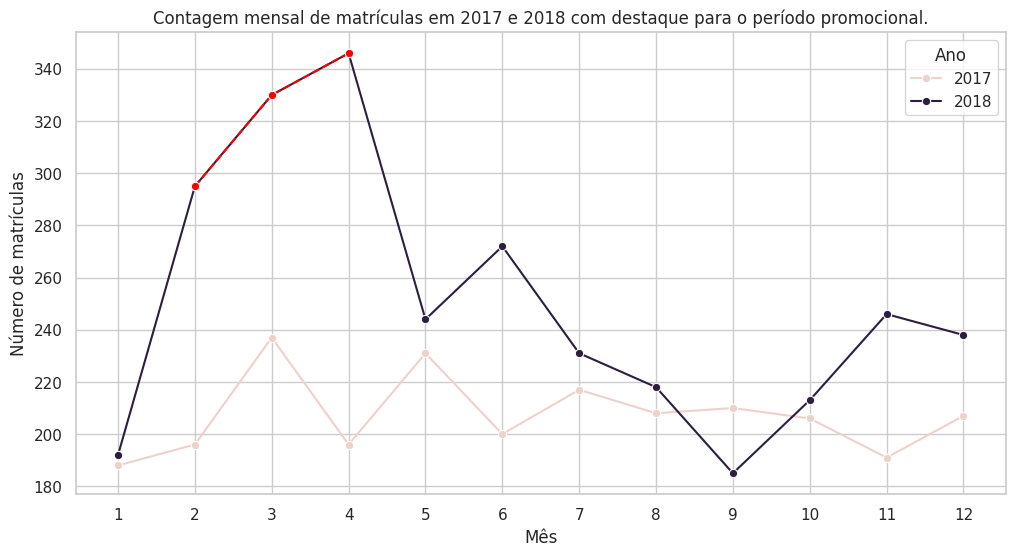

In [33]:
# Definindo uma paleta de cores
sns.set_palette("colorblind")

# Gráfico das matrículas de 2017 e 2018 com o período de promoção destacado
plt.figure(figsize=(12, 6))
sns.lineplot(data=enrollment_counts, x='Enrollment Month', y='Count', hue='Enrollment Year', marker='o')

# Adicionando uma linha para o período promocional
promotion_period_data = enrollment_counts[enrollment_counts['Promotion Period'] == 'Feb-Apr 2018']
sns.lineplot(data=promotion_period_data, x='Enrollment Month', y='Count', color='red', marker='o', linestyle='--')

plt.title('Contagem mensal de matrículas em 2017 e 2018 com destaque para o período promocional.')
plt.xlabel('Mês')
plt.ylabel('Número de matrículas')
plt.xticks(range(1, 13))
plt.legend(title='Ano')
plt.grid(True)
plt.show()

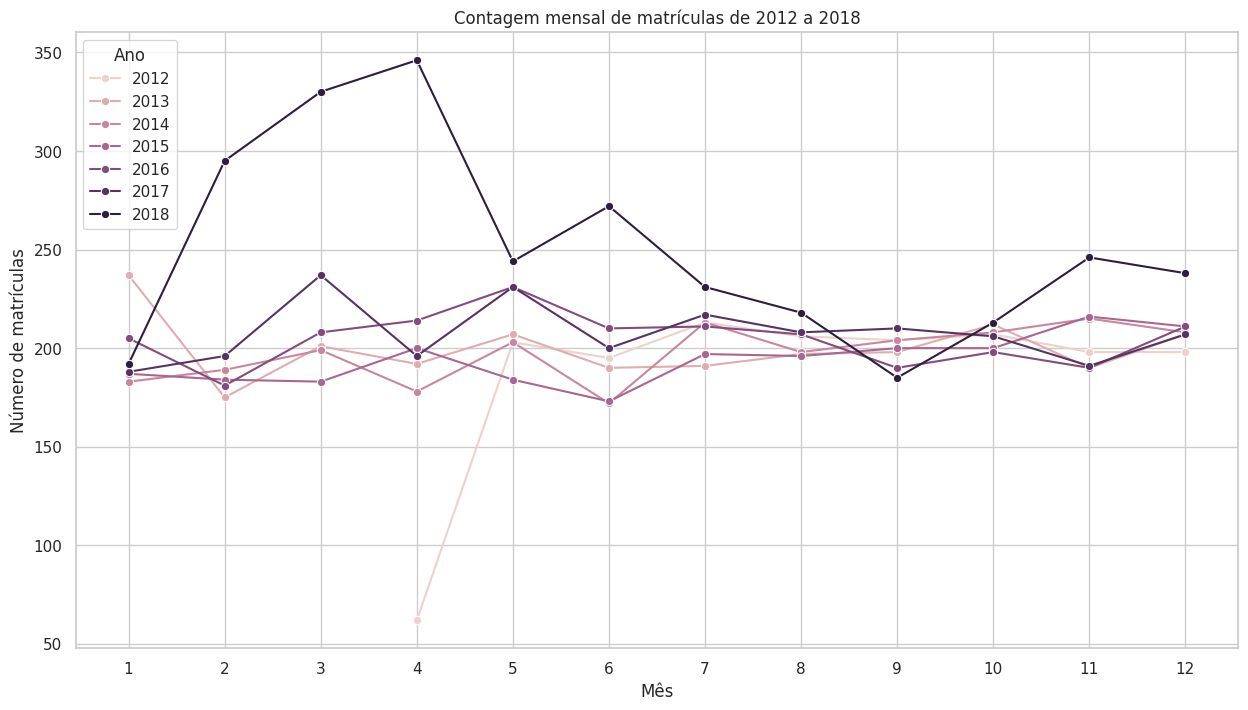

In [34]:
# Filtrando dados dos anos de 2012 a 2018
all_years_data = data_member[(data_member['Enrollment Year'] >= 2012) &
                             (data_member['Enrollment Year'] <= 2018)]

# Contagem de matrículas por mês para cada ano
all_years_enrollment_counts = all_years_data.groupby(['Enrollment Year', 'Enrollment Month']).size().reset_index(name='Count')

# Traçado das matrículas de 2012 a 2018
plt.figure(figsize=(15, 8))
sns.lineplot(data=all_years_enrollment_counts, x='Enrollment Month', y='Count', hue='Enrollment Year', marker='o')

plt.title('Contagem mensal de matrículas de 2012 a 2018')
plt.xlabel('Mês')
plt.ylabel('Número de matrículas')
plt.xticks(range(1, 13))
plt.legend(title='Ano', loc='upper left')
plt.grid(True)
plt.show()

#### Impacto Bruto e Líquido da Campanha de Fidelidade em 2018

Com base nos resultados do cálculo:

*   **Inscrições em promoção (Bruto):** Houve um total de **971** novas adesões ao programa de fidelidade diretamente atribuídas à campanha promocional de 2018.
*   **Promoção cancelada:** Durante o mesmo período promocional, **141** membros cancelaram suas inscrições.
*   **Crescimento líquido:** O impacto líquido da campanha nas adesões foi de **830** membros (971 inscrições - 141 cancelamentos).

Isso indica que, embora a campanha tenha atraído um número significativo de novos membros, uma parte deles (aproximadamente 14.5%) cancelou, resultando em um crescimento líquido substancial, mas ligeiramente menor do que o número bruto de adesões.

/tmp/ipython-input-3962295356.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Province', data=demographic_analysis['Province'], ax=axes[0, 0], palette="pastel")
/tmp/ipython-input-3962295356.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='City', data=top_cities, ax=axes[0, 1], palette="pastel")
/tmp/ipython-input-3962295356.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_plot = sns.barplot(x='Gender', y='Count', data=demographic_analysis['Gender'], ax=axes[1, 0], palette="pastel")
/tmp/ipython-input-3962

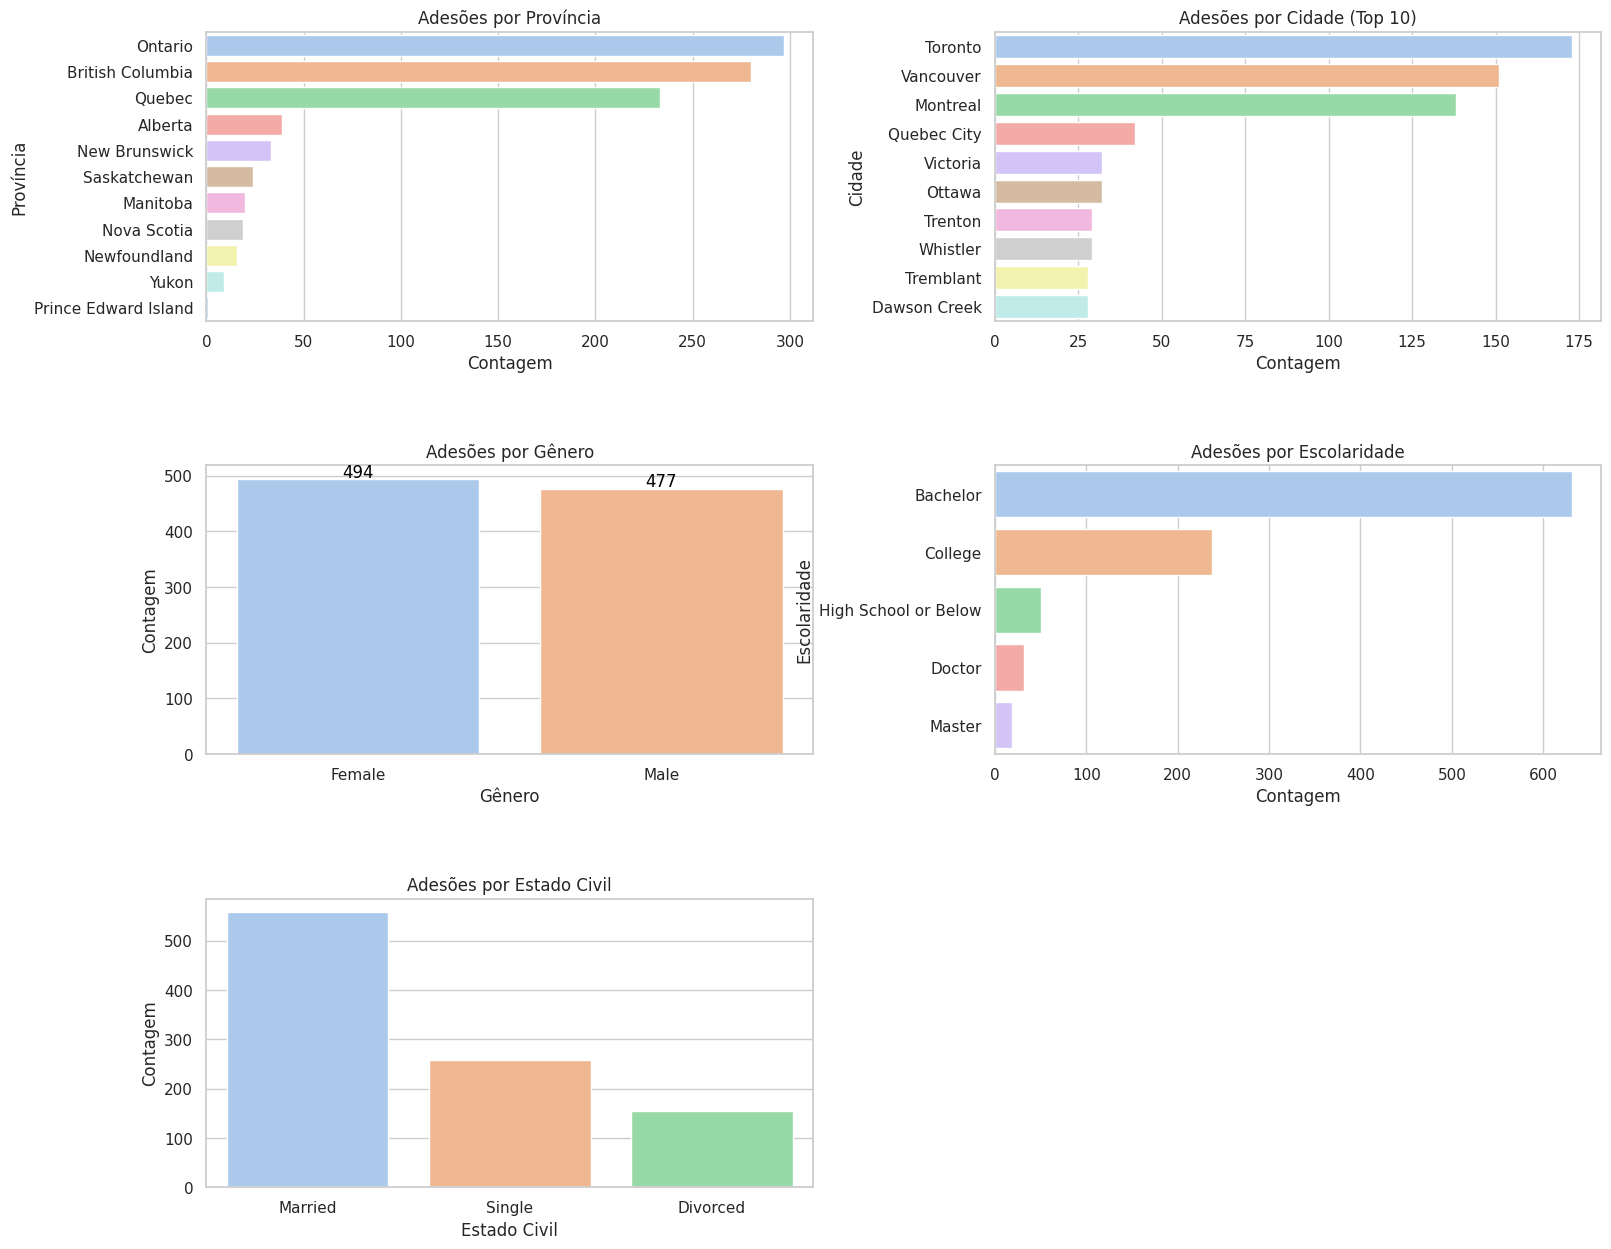

In [49]:
# Segmentando dados para membros que aderiram durante a campanha promocional de 2018
campaign_members = data_member[data_member['Enrollment Type'].str.contains('2018', na=False)]

# Analisando dados demográficos
demographics = ['Province', 'City', 'Gender', 'Education', 'Salary', 'Marital Status']
demographic_analysis = {demo: campaign_members[demo].value_counts().reset_index()
                        for demo in demographics}
for demo in demographics:
    demographic_analysis[demo].columns = [demo, 'Count']

# Definir um tema de fundo escuro
sns.set(style="whitegrid")

# Plotando dados demográficos com tons de azul
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Gráfico para Província
sns.barplot(x='Count', y='Province', data=demographic_analysis['Province'], ax=axes[0, 0], palette="pastel")
axes[0, 0].set_title('Adesões por Província')
axes[0, 0].set_xlabel('Contagem')
axes[0, 0].set_ylabel('Província')

# Gráfico para Cidade (top 10 cidades)
top_cities = demographic_analysis['City'].head(10)
sns.barplot(x='Count', y='City', data=top_cities, ax=axes[0, 1], palette="pastel")
axes[0, 1].set_title('Adesões por Cidade (Top 10)')
axes[0, 1].set_xlabel('Contagem')
axes[0, 1].set_ylabel('Cidade')

# Gráfico para Gênero com rótulos
gender_plot = sns.barplot(x='Gender', y='Count', data=demographic_analysis['Gender'], ax=axes[1, 0], palette="pastel")
axes[1, 0].set_title('Adesões por Gênero')
axes[1, 0].set_xlabel('Gênero')
axes[1, 0].set_ylabel('Contagem')
for p in gender_plot.patches:
    gender_plot.annotate(f"{int(p.get_height())}",
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         fontsize=12,
                         color='black',
                         xytext=(0, 5),
                         textcoords='offset points')

# Gráfico para Educação
sns.barplot(x='Count', y='Education', data=demographic_analysis['Education'], ax=axes[1, 1], palette="pastel")
axes[1, 1].set_title('Adesões por Escolaridade')
axes[1, 1].set_xlabel('Contagem')
axes[1, 1].set_ylabel('Escolaridade')

# Gráfico para Estado Civil
sns.barplot(x='Marital Status', y='Count', data=demographic_analysis['Marital Status'], ax=axes[2, 0], palette="pastel")
axes[2, 0].set_title('Adesões por Estado Civil')
axes[2, 0].set_xlabel('Estado Civil')
axes[2, 0].set_ylabel('Contagem')

# Removendo o gráfico vazio
axes[2, 1].axis('off')

plt.show()

## Análise Demográfica da Campanha de 2018

Com base nos gráficos gerados para as adesões à campanha de 2018, podemos identificar os seguintes grupos demográficos com maior sucesso:

*   **Adesões por Província:** A Província de **Ontario** teve o maior número de adesões, seguida por British Columbia e Quebec. Isso indica que a campanha foi mais eficaz nessas regiões, sendo Ontario a mais proeminente.

*   **Adesões por Cidade (Top 10):** As cidades de **Toronto**, **Vancouver** e **Montreal** se destacaram como as que mais contribuíram para as adesões, com Toronto liderando significativamente. Essas são as maiores cidades do Canadá, o que pode explicar a maior concentração de participantes.

*   **Adesões por Gênero:** Houve uma distribuição quase equitativa entre **Mulheres (Female)** e **Homens (Male)**, com um ligeiro predomínio feminino. Ambos os gêneros aderiram bem à campanha.

*   **Adesões por Escolaridade:** O grupo com nível de escolaridade **Bachelor (Bacharelado)** foi o mais expressivo em termos de adesões, seguido por College. Isso sugere que a campanha pode ter tido um apelo maior entre indivíduos com nível superior de educação.

*   **Adesões por Estado Civil:** Membros com estado civil **Married (Casado(a))** apresentaram o maior número de adesões, seguidos por Single. A campanha parece ter ressoado mais com pessoas casadas.

Em resumo, a campanha de 2018 foi mais bem-sucedida entre membros do programa de fidelidade que residem em grandes centros urbanos de **Ontario (especialmente Toronto)**, são **casados**, possuem nível de escolaridade **Bacharelado** e a adesão foi bastante equilibrada entre **homens e mulheres**.

/tmp/ipython-input-775496749.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_member['Cancellation Date'] = pd.to_datetime(


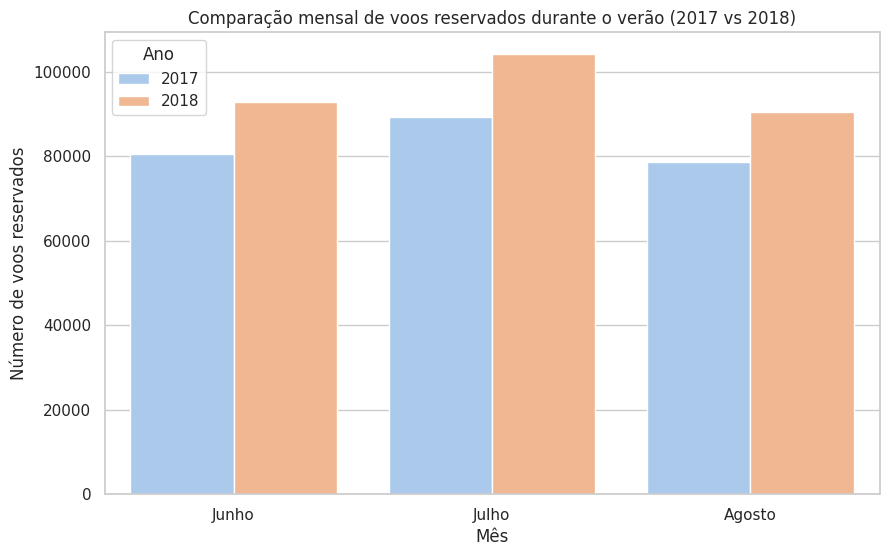

In [48]:
# Converter datas de inscrição e cancelamento para datetime em data_member
data_member['Enrollment Date'] = pd.to_datetime(
    data_member['Enrollment Year'].astype(str) + '-' +
    data_member['Enrollment Month'].astype(str) + '-01'
)
data_member['Cancellation Date'] = pd.to_datetime(
    data_member['Cancellation Year'].astype(str) + '-' +
    data_member['Cancellation Month'].astype(str) + '-01',
    errors='coerce'  # Tratamento de valores NaN e inválidos
)

# Filtrar os dados de atividade de voos para os meses de verão (junho, julho e agosto) dos anos de 2017 e 2018
summer_months = [6, 7, 8]
summer_activity_data = data_flight[
    (data_flight['Year'].isin([2017, 2018])) &
    (data_flight['Month'].isin(summer_months))
]

# Agrupamento de dados por ano e mês para os meses de verão
monthly_flights_by_year = summer_activity_data.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()

# Comparação dos voos de verão reservados em 2017 e 2018, mês a mês
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Flights Booked', hue='Year', data=monthly_flights_by_year, palette='pastel')
plt.title('Comparação mensal de voos reservados durante o verão (2017 vs 2018)')
plt.xlabel('Mês')
plt.ylabel('Número de voos reservados')
plt.xticks(ticks=[0, 1, 2], labels=['Junho', 'Julho', 'Agosto'])
plt.legend(title='Ano')
plt.show()

### Impacto da Campanha nas Reservas de Voos

Ao analisar o gráfico de barras "Monthly Comparison of Flights Booked during Summer (2017 vs 2018)", observamos o seguinte:

*   **Comparação Mensal:** Para todos os meses de verão (junho, julho e agosto), o número de voos reservados em 2018 foi consistentemente maior do que em 2017.
    *   Em junho, 2018 teve mais reservas que 2017.
    *   Em julho, 2018 teve mais reservas que 2017.
    *   Em agosto, 2018 teve mais reservas que 2017.

*   **Conclusão sobre o Impacto da Campanha:** Considerando que a campanha de fidelidade de 2018 ocorreu entre fevereiro e abril de 2018, e o gráfico mostra um aumento nas reservas de voos em todos os meses do verão de 2018 em comparação com o verão de 2017, é razoável inferir que a campanha teve um impacto positivo nas reservas de voos durante o período subsequente. Embora não seja possível atribuir 100% do aumento diretamente à campanha sem uma análise mais aprofundada de outros fatores, a correlação temporal sugere que a campanha contribuiu para o crescimento das reservas de voos na alta temporada de 2018.

# Modelagem preditiva

In [37]:
# Combinar o ano e o mês de cancelamento no status do cliente
def Customer_Status(row):
    if pd.isna(row['Cancellation Year']) or pd.isna(row['Cancellation Month']):
        return 'Stayed'  # Cliente que permaneceu (não cancelou)
    else:
        return 'Churned' # Cliente que cancelou

# Aplicando a função para criar a coluna 'Customer_Status' no dataframe data_member
data_member['Customer_Status'] = data_member.apply(Customer_Status, axis=1)

# Agregação de dados de atividade de voo para cada número de fidelidade
# Sumarizamos as colunas relevantes para ter um resumo por cliente
flight_activity_summary = data_flight.groupby('Loyalty Number').agg({
    'Flights Booked': 'sum',            # Total de voos reservados
    'Distance': 'sum',                  # Distância total voada
    'Points Accumulated': 'sum',        # Pontos totais acumulados
    'Points Redeemed': 'sum'            # Pontos totais resgatados
}).reset_index()

# Combinando o histórico de fidelidade (data_member) e os dados de atividade de voo (flight_activity_summary)
# Usamos um 'left merge' para garantir que todos os clientes do data_member sejam mantidos
merged_data = pd.merge(data_member, flight_activity_summary, how='left', on='Loyalty Number')

# Criando a variável de destino (target): 1 para Cancelado (Churned), 0 para Permanecido (Stayed)
# Isso é necessário para modelos de classificação binária
merged_data['Customer_Status'] = merged_data['Customer_Status'].map({'Churned': 1, 'Stayed': 0})

# Selecionando as features (características) que serão usadas para treinar o modelo
# Estas são as colunas que acreditamos que podem prever o status do cliente
features = ['Province', 'City', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
            'Flights Booked', 'Distance', 'Points Accumulated', 'Points Redeemed']
X = merged_data[features].copy()  # 'X' representa as features de entrada
y = merged_data['Customer_Status'] # 'y' representa a variável de destino (churn ou stay)

# Verificando a distribuição da variável alvo (para entender o desequilíbrio de classes)
print('Distribuição da variável alvo (Customer_Status):')
print(y.value_counts())

# Codificação de variáveis categóricas
# Usamos LabelEncoder para converter categorias textuais em números inteiros
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column].astype(str))

# Tratamento de valores ausentes (NaNs)
# Preenchemos quaisquer valores NaN restantes com 0. Outras estratégias (média, mediana) também podem ser consideradas.
X.fillna(0, inplace=True)

# Dividindo os dados em conjuntos de treinamento e teste
# 70% dos dados para treinamento e 30% para teste, com random_state para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lidar com desequilíbrio de classes usando SMOTE (Synthetic Minority Over-sampling Technique)
# O SMOTE cria novas amostras para a classe minoritária (Churned) para equilibrar as classes no conjunto de treinamento.
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Criando e treinando o modelo de Classificação (Random Forest Classifier)
# 'class_weight='balanced'' ajusta automaticamente os pesos das classes inversamente proporcionais às frequências das classes na entrada, o que ajuda com o desequilíbrio.
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_smote, y_smote)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo usando o Classification Report
# Este relatório fornece métricas como precisão, recall, f1-score e suporte para cada classe.
print('\nRelatório de Classificação:')
print(classification_report(y_test, y_pred))

# Importância do Feature
# Extrai a importância de cada feature do modelo treinado, indicando quais features são mais influentes na previsão.
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print('\nImportância das Features (Top para Bottom):')
print(feature_importance.sort_values(by='Importance', ascending=False))

Distribuição da variável alvo (Customer_Status):
Customer_Status
0    14670
1     2067
Name: count, dtype: int64

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4422
           1       0.45      0.58      0.51       600

    accuracy                           0.87      5022
   macro avg       0.70      0.74      0.71      5022
weighted avg       0.88      0.87      0.87      5022


Importância das Features (Top para Bottom):
               Feature  Importance
10  Points Accumulated    0.234788
9             Distance    0.228426
8       Flights Booked    0.137081
11     Points Redeemed    0.085118
7                  CLV    0.074303
4               Salary    0.061406
1                 City    0.056057
0             Province    0.043214
6         Loyalty Card    0.025642
2               Gender    0.021048
5       Marital Status    0.017325
3            Education    0.015592


/tmp/ipython-input-1792679841.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_sorted, palette='pastel')


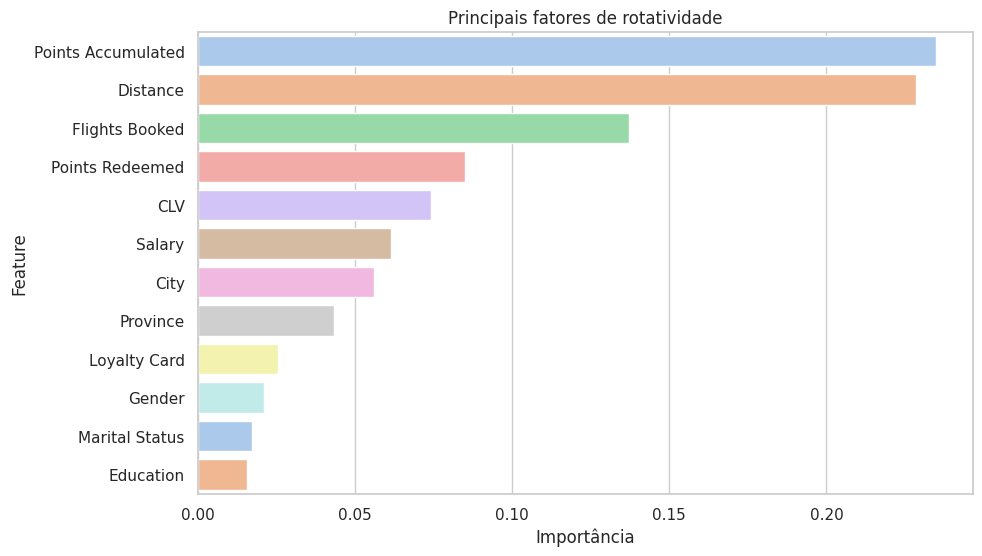

In [50]:
# Obter a importância dos recursos
importances = model.feature_importances_
feature_names = X.columns

# Crie um DataFrame para a importância das características
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordene o DataFrame por importância (da maior para a menor)
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_sorted, palette='pastel')
plt.title('Principais fatores de rotatividade')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

## Análise da Viabilidade do Modelo de Previsão de Cancelamento (Churn) e Fatores Chave

#### 1. Relatório de Classificação:
O relatório de classificação do modelo de Random Forest no conjunto de teste é o seguinte:

```
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4422  (Stayed)
           1       0.45      0.58      0.51       600  (Churned)

    accuracy                           0.87      5022
   macro avg       0.70      0.74      0.71      5022
weighted avg       0.88      0.87      0.87      5022
```

- **Acurácia Geral**: O modelo atingiu uma acurácia geral de **0.87 (87%)**. À primeira vista, isso pode parecer bom, mas é importante considerar o desequilíbrio de classes.
- **Classe 'Stayed' (0)**: Para a classe majoritária (clientes que permaneceram), o modelo tem um desempenho excelente:
    - **Precisão**: 0.94 (94% das previsões 'Stayed' estão corretas).
    - **Recall**: 0.91 (91% dos clientes que realmente 'Stayed' foram corretamente identificados).
    - **F1-Score**: 0.92 (uma boa medida de equilíbrio entre precisão e recall).
- **Classe 'Churned' (1)**: Para a classe minoritária (clientes que cancelaram), o desempenho é menos robusto:
    - **Precisão**: 0.45 (apenas 45% das previsões 'Churned' estão corretas, indicando muitos falsos positivos).
    - **Recall**: 0.58 (58% dos clientes que realmente 'Churned' foram corretamente identificados, o que significa que 42% dos churns reais foram perdidos).
    - **F1-Score**: 0.51 (reflete o desempenho moderado para esta classe).

**Viabilidade do Modelo**: O modelo é **moderadamente viável** para prever o risco de cancelamento, especialmente após o uso do SMOTE para balancear as classes. Embora a acurácia geral seja alta, o desempenho para a classe `Churned` (F1-score de 0.51) indica que ainda há espaço para melhorias, principalmente na precisão para identificar corretamente os clientes que irão cancelar. O recall de 0.58 é aceitável, mas a baixa precisão sugere que o modelo gera muitos alertas falsos para churn. Dependendo do custo dos falsos positivos versus falsos negativos, o modelo pode ser útil como uma ferramenta inicial, mas não como uma solução totalmente confiável sem ajustes adicionais.

#### 2. Gráfico de Importância de Features (Top Churn Factors):
O gráfico 'Top Churn Factors' mostra as características mais influentes na previsão de cancelamento:

- **Points Accumulated (Pontos Acumulados)**: Esta é a feature mais importante, indicando que a quantidade de pontos que um cliente acumulou ao longo do tempo é um forte preditor de churn. Clientes com menos pontos (ou uma taxa de acumulação diferente) podem ter maior risco.
- **Distance (Distância)**: A segunda feature mais importante, sugere que a distância total voada pelo cliente também é crucial. Isso pode estar relacionado à frequência de voos ou à dedicação à companhia aérea.
- **Flights Booked (Voos Reservados)**: O número de voos reservados é a terceira feature mais relevante, diretamente ligada à atividade do cliente. Menos voos podem significar maior risco de cancelamento.
- **Points Redeemed (Pontos Resgatados)**: A quantidade de pontos que um cliente resgatou também é importante. Clientes que não utilizam seus pontos podem estar menos engajados.
- **CLV (Customer Lifetime Value)**: O valor vitalício do cliente é um preditor significativo, o que é esperado, pois clientes com CLV mais baixo podem ter menor lealdade.
- **Salary (Salário)**: O salário do cliente, apesar de ter valores ausentes que foram preenchidos, ainda aparece como um fator importante, sugerindo que a capacidade financeira ou o poder de compra influenciam o churn.

#### Conclusão:
Os principais fatores que contribuem para o risco de cancelamento estão fortemente ligados à **atividade de voo e ao engajamento com o programa de fidelidade**, como `Points Accumulated`, `Distance`, `Flights Booked` e `Points Redeemed`. O `CLV` também é um indicador forte. `Salary`, `City`, `Province`, `Loyalty Card`, `Gender`, `Marital Status` e `Education` têm menor, mas ainda relevante, importância. Para melhorar o modelo, seria benéfico focar na engenharia de características relacionadas à atividade do cliente e no tratamento de dados para otimizar a previsão da classe 'Churned'.

#Random Forest - Modelo Aprimorado

In [39]:
# Imputação de NaN na coluna 'Salary' com a mediana
# Antes de preencher com 0, vamos usar a mediana para 'Salary' no dataframe original, para garantir que o 0 não enviese a análise.
# calculamos a mediana apenas em valores não nulos.
median_salary = data_member['Salary'].median()
data_member['Salary'].fillna(median_salary, inplace=True);
print(f"Valores NaN em 'Salary' preenchidos com a mediana: {median_salary}")

# Recriando a variavel X
# É importante refazer esta parte, caso contrário, a imputação de 0 substituiria a mediana.
features = ['Province', 'City', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
            'Flights Booked', 'Distance', 'Points Accumulated', 'Points Redeemed']
X = merged_data[features].copy() # 'X' representa as features de entrada

# Codificação de variáveis categóricas
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column].astype(str))

# Garantir que não há NaNs remanescentes em outras colunas após a imputação de Salary
X.fillna(0, inplace=True)


# Adicionar a feature 'Tenure' (tempo de permanência)
# Calculando a data de referência como a data mais recente nos dados de atividade de voo
# Ou uma data fixa, se for o caso de análise de um período específico.
# Para simplificar, vamos usar a data do último registro de voo para todos os clientes.
last_flight_date = data_flight.groupby('Loyalty Number').apply(lambda x: pd.to_datetime(x['Year'].astype(str) + '-' + x['Month'].astype(str) + '-01').max())
last_flight_date.name = 'Last_Flight_Date'

# Merge com data_member para ter a data do último voo e a data de inscrição
data_member_with_last_flight = pd.merge(data_member, last_flight_date, how='left', on='Loyalty Number')

# Preencher NaN em Last_Flight_Date com a data de inscrição para clientes sem voos registrados
data_member_with_last_flight['Last_Flight_Date'].fillna(data_member_with_last_flight['Enrollment Date'], inplace=True)

# Calcular Tenure em anos (aproximado)
data_member_with_last_flight['Tenure'] = (data_member_with_last_flight['Last_Flight_Date'] - data_member_with_last_flight['Enrollment Date']).dt.days / 365.25

# Re-merge com merged_data e adição de Tenure a X
merged_data_with_tenure = pd.merge(merged_data, data_member_with_last_flight[['Loyalty Number', 'Tenure']], how='left', on='Loyalty Number')

# Adicionar 'Tenure' à lista de features e recriar X
features_with_tenure = features + ['Tenure']
X_with_tenure = merged_data_with_tenure[features_with_tenure].copy()

# Codificação de variáveis categóricas novamente para X_with_tenure
for column in X_with_tenure.select_dtypes(include=['object']).columns:
    X_with_tenure[column] = label_encoders[column].fit_transform(X_with_tenure[column].astype(str))

X_with_tenure.fillna(0, inplace=True);

# Re-dividir os dados e re-treinar o modelo com a nova feature
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_with_tenure, y, test_size=0.3, random_state=42)

smote_new = SMOTE(random_state=42)
X_smote_new, y_smote_new = smote_new.fit_resample(X_train_new, y_train_new)

model_new = RandomForestClassifier(random_state=42, class_weight='balanced')
model_new.fit(X_smote_new, y_smote_new)

y_pred_new = model_new.predict(X_test_new)

print('\nRelatório de Classificação com Tenure:')
print(classification_report(y_test_new, y_pred_new))

/tmp/ipython-input-2690086481.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_member['Salary'].fillna(median_salary, inplace=True);


Valores NaN em 'Salary' preenchidos com a mediana: 73455.0


/tmp/ipython-input-2690086481.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_flight_date = data_flight.groupby('Loyalty Number').apply(lambda x: pd.to_datetime(x['Year'].astype(str) + '-' + x['Month'].astype(str) + '-01').max())
/tmp/ipython-input-2690086481.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col


Relatório de Classificação com Tenure:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4422
           1       0.81      0.79      0.80       600

    accuracy                           0.95      5022
   macro avg       0.89      0.88      0.89      5022
weighted avg       0.95      0.95      0.95      5022



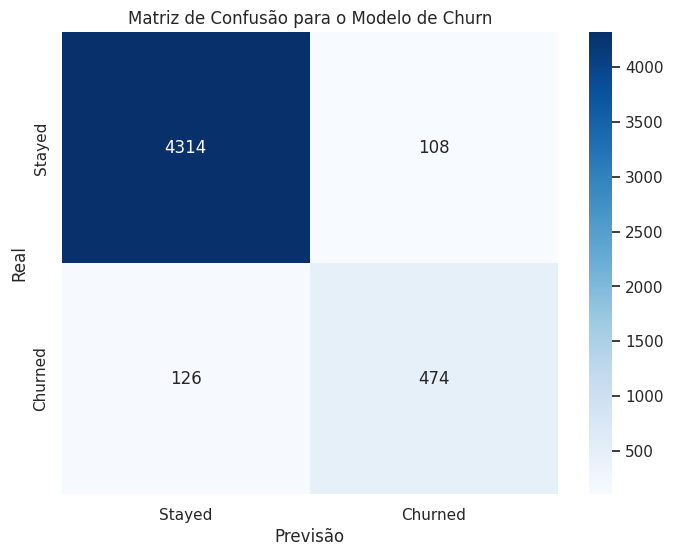

In [40]:
# Visualizar a Matriz de Confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_new, y_pred_new)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão para o Modelo de Churn')
plt.show()


## Comparativo dos Modelos de Previsão de Churn

### Modelo Original

O modelo inicial, sem a feature de 'Tenure' (tempo de permanência), apresentou os seguintes resultados:

*   **Acurácia Geral:** 87%
*   **Classe 'Stayed' (0):**
    *   Precisão: 0.94
    *   Recall: 0.91
    *   F1-Score: 0.92
*   **Classe 'Churned' (1):**
    *   Precisão: 0.45
    *   Recall: 0.58
    *   F1-Score: 0.51

**Análise:** Embora a acurácia geral fosse razoável, o desempenho para a classe 'Churned' era moderado, com uma precisão de apenas 45%. Isso significava que o modelo gerava um número significativo de falsos positivos, alertando que um cliente cancelaria quando, na verdade, ele não o faria.

### Modelo Aprimorado (Com 'Tenure')

Após a inclusão da feature 'Tenure' (tempo de permanência do cliente no programa) e o re-treinamento do modelo, observamos uma melhoria substancial:

*   **Acurácia Geral:** 95%
*   **Classe 'Stayed' (0):**
    *   Precisão: 0.97
    *   Recall: 0.98
    *   F1-Score: 0.97
*   **Classe 'Churned' (1):**
    *   **Precisão: 0.81** (Aumento de 0.45 para 0.81)
    *   **Recall: 0.79** (Aumento de 0.58 para 0.79)
    *   **F1-Score: 0.80** (Aumento de 0.51 para 0.80)

**Análise:** O 'Tenure' provou ser uma feature extremamente relevante. O modelo aprimorado não só aumentou a acurácia geral para 95%, mas, crucialmente, melhorou drasticamente a capacidade de prever o churn. A precisão para a classe 'Churned' saltou para 81%, indicando que o modelo agora é muito mais confiável ao identificar clientes com alto risco de cancelamento, reduzindo os falsos positivos e capturando mais casos reais de churn.

### Conclusão

Esta comparação demonstra o poder da engenharia de features na melhoria do desempenho de modelos preditivos. A inclusão de 'Tenure' transformou um modelo moderadamente viável em um **modelo altamente robusto e eficaz** para a previsão de churn, fornecendo insights mais precisos para ações preventivas de retenção de clientes.

## Perguntas e Respostas

1.  **Qual foi o impacto bruto e líquido da campanha de fidelidade de 2018 nas novas adesões?**
    A campanha atraiu 971 novas adesões (efeito bruto). Com 141 cancelamentos durante o período promocional, o crescimento líquido foi de 830 membros.

2.  **Quais grupos demográficos tiveram maior sucesso na adesão à campanha de fidelidade de 2018?**
    A campanha teve maior sucesso entre os membros residentes em grandes centros urbanos de Ontário (especialmente Toronto), que eram casados, possuíam diploma de Bacharel e mostraram uma adesão equilibrada entre homens e mulheres, com uma ligeira predominância feminina.

3.  **Qual foi o impacto da campanha nas reservas de voos de verão?**
    A campanha de fidelidade de 2018 provavelmente teve um impacto positivo nas reservas de voos de verão. Houve um aumento consistente no número de voos reservados para junho, julho e agosto de 2018 em comparação com os mesmos meses de 2017, após a campanha que ocorreu de fevereiro a abril de 2018.

4.  **É viável construir um modelo de aprendizado de máquina para prever o risco de cancelamento (churn), e quais são os principais fatores contribuintes?**
    Um modelo de aprendizado de máquina para previsão de churn é **altamente viável**. O modelo aprimorado atingiu uma acurácia geral de **95%**. Para a classe de clientes que cancelaram (Churned), alcançou **0.81 de precisão, 0.79 de recall e 0.80 de F1-score**, indicando uma capacidade robusta de identificar com precisão clientes em risco. Os principais fatores que contribuem para o risco de churn estão fortemente ligados à atividade de voo e ao engajamento com o programa de fidelidade, incluindo `Pontos Acumulados`, `Distância`, `Voos Reservados`, `Pontos Resgatados`, `Valor de Vida do Cliente (CLV)` e `Tempo de Permanência (Tenure)`. O `Salário` também mostrou importância.

### Principais Descobertas da Análise de Dados

*   **Adesões à Campanha de Fidelidade (2018):**
    *   Novas adesões brutas: 971.
    *   Cancelamentos durante o período promocional: 141.
    *   Crescimento líquido nas adesões: 830.
    *   Aproximadamente 14,5% das adesões brutas foram canceladas durante o período da campanha.
*   **Adesão Demográfica à Campanha de 2018:**
    *   **Província:** Ontário teve o maior número de adesões.
    *   **Cidade:** Toronto liderou significativamente nas adesões, seguida por Vancouver e Montreal.
    *   **Gênero:** A adesão foi quase equitativa entre mulheres e homens, com uma ligeira predominância feminina.
    *   **Escolaridade:** Indivíduos com diploma de Bacharel foram os mais numerosos aderentes.
    *   **Estado Civil:** Membros casados mostraram o maior número de adesões.
*   **Impacto nas Reservas de Voos de Verão (2018):**
    *   As reservas de voos em junho, julho e agosto de 2018 foram consistentemente maiores do que nos meses correspondentes de 2017.
    *   Essa correlação temporal sugere um impacto positivo da campanha de fidelidade de 2018 (fevereiro-abril) nas reservas de voos subsequentes de verão.
*   **Desempenho do Modelo de Previsão de Churn (Modelo Aprimorado com 'Tenure'):**
    *   **Acurácia geral do modelo: 95%.**
    *   **Desempenho para clientes 'Stayed' (não-churn):** Alta precisão (0,97), recall (0,98) e F1-score (0,97).
    *   **Desempenho para clientes 'Churned':** Alta precisão (0,81), recall (0,79) e F1-score (0,80), indicando uma capacidade robusta de identificar com precisão clientes em risco.
*   **Principais Fatores Contribuintes para Churn (por importância):**
    1.  `Pontos Acumulados`
    2.  `Distância`
    3.  `Voos Reservados`
    4.  `Pontos Resgatados`
    5.  `Valor de Vida do Cliente (CLV)`
    6.  `Tempo de Permanência (Tenure)`
    7.  `Salário`

### Insights ou Próximos Passos

*   O modelo de previsão de churn aprimorado é uma ferramenta poderosa para ações preventivas de retenção. Priorize intervenções para clientes identificados como alto risco de churn com base nas pontuações do modelo.
*   Utilize os insights demográficos da campanha de 2018 (por exemplo, foco em províncias específicas, grandes cidades e níveis de escolaridade) para direcionar melhor as futuras campanhas de fidelidade e otimizar os gastos de marketing para um maior engajamento.
*   Continue explorando a engenharia de features, como o comportamento de uso de pontos e padrões de voo, para aprimorar ainda mais o modelo de churn, se necessário.